<a href="https://colab.research.google.com/github/bkrant/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(2)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
6364,22,6500.0,5,123,1.4,3,1,2011,0
245,43,135555.0,0,0,4.5,0,1,2016,1


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [9]:
y = df.price
X = df[df.columns.drop(['price']).tolist()]
X.sample(2)

,make,body,mileage,engV,engType,registration,year,drive
5518,13,3,136,2.7,3,1,2006,0
1507,12,3,140,1.6,3,1,2006,0


## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [13]:
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, X_train.columns)
print(coefficients.to_string())

Intercept -2269355.0772314165
make             -35.167266
body           -1770.985091
mileage          -40.268597
engV             273.035408
engType        -1111.080317
registration    4535.060134
year            1140.731248
drive           8292.046139


## 1.5 Use the test data to make predictions.

In [0]:
y_pred = model.predict(X_test)

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [15]:
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('OLS Test Root Mean Squared Error', rmse)
    print('OLS Test R^2 Score', r2)

OLS Test Root Mean Squared Error 21394.43524600266
OLS Test R^2 Score 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

Assuming all other features are held constant,  for every unit change in year, the average price should increase by 1140.73

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

Assuming all other features are held constant,  for every unit change in year, the average price should increase by 1140.73

## 1.9 How should we interpret the $R^2$?

1.   List item
2.   List item


One sentence can be sufficient

$R^2$ is the proportionate reduction of total variation associated with the use of all the features in the model.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['Ln_price'] = np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

In [0]:
target

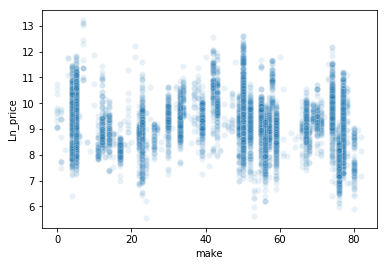

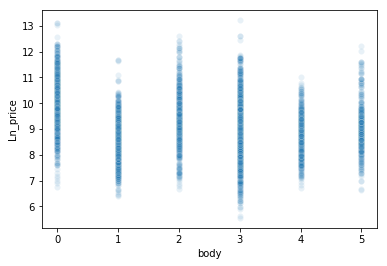

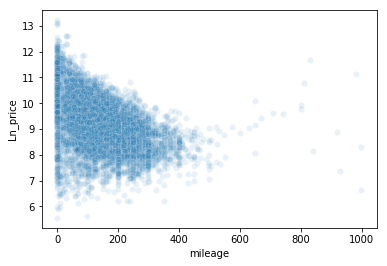

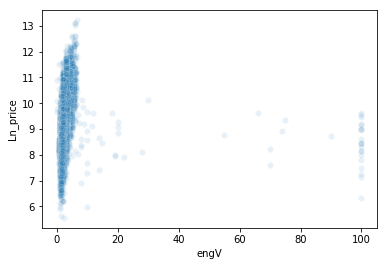

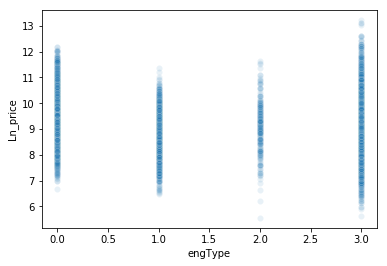

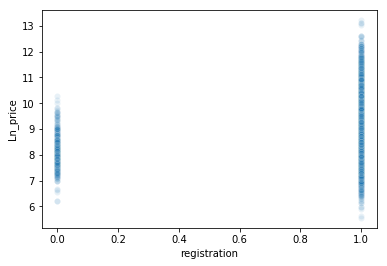

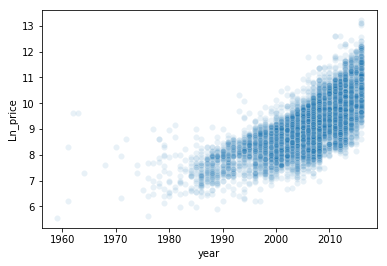

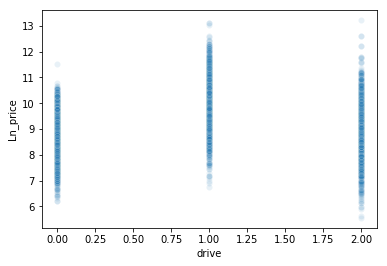

In [19]:
for feature in X:
  sns.scatterplot(x=feature, y=df.Ln_price, data=df, alpha=0.1)
  plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [47]:
X['year ** 2'] = X['year']**2
X['year ** 3'] = X['year']**3
X['Ln_year'] = np.log(X['year'])
X.sample(2)

,make,body,mileage,engV,engType,registration,year,drive,Ln_year,year ** 2,year ** 3
8367,74,3,150,2.4,3,1,2007,0,7.604396,4028049,8084294343
4333,55,2,171,1.5,0,1,2004,0,7.602900,4016016,8048096064


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [50]:
def run_linear_model(X, y):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('Test Root Mean Squared Error', rmse)
    print('Test R^2 Score', r2)
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())

run_linear_model(X, df.Ln_price)

Test Root Mean Squared Error 0.5633576324026763
Test R^2 Score 0.6688400346353676
Intercept -171121.8699917546
make             -0.001719
body             -0.093239
mileage           0.000714
engV              0.008353
engType          -0.047572
registration      0.675316
year            259.949229
drive             0.372255
Ln_year           0.391152
year ** 2        -0.131649
year ** 3         0.000022


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Assuming all other features are held constant, for every unit change in a given feature, the average percentage change price is given by that feature's coefficient. 

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [0]:
def run_decisiontree_model(X, y, max_depth=1):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    #print('Decision tree Test Root Mean Squared Error', rmse)
    print('Decision Tree Test R^2 Score', r2)

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [67]:
run_decisiontree_model(X, df.price, max_depth=7)

Decision Tree Test R^2 Score 0.8200506025111765


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [72]:
model = sm.OLS(df.Ln_price, sm.add_constant(X))
results = model.fit(cov_type="HC3")
print(results.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1563.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:00:35   Log-Likelihood:                -6963.4
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0047      0.000     10.101   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
Yes, because 'year ** 3', 'year ** 2', 'year', 'Ln_year' have a VIF much greater than 10.

In [76]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns).sort_values(ascending=False)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


year ** 3       2.440975e+13
year ** 2       1.654148e+10
year            4.785013e+09
Ln_year         1.164778e+07
mileage         1.938445e+00
body            1.158356e+00
engType         1.154863e+00
drive           1.139712e+00
registration    1.108461e+00
make            1.060443e+00
engV            1.010019e+00
const           0.000000e+00
dtype: float64